In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
nabihazahid_spotify_dataset_for_churn_analysis_path = kagglehub.dataset_download('nabihazahid/spotify-dataset-for-churn-analysis')

print('Data source import complete.')


Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotify-dataset-for-churn-analysis/spotify_churn_dataset.csv


**LOADING THE DATASET**

In [3]:
df = pd.read_csv("/kaggle/input/spotify-dataset-for-churn-analysis/spotify_churn_dataset.csv")
df

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1
1,2,Other,33,DE,Family,141,62,0.34,Web,0,1,0
2,3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1
3,4,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0
4,5,Other,29,US,Family,250,57,0.36,Mobile,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7995,7996,Other,44,DE,Student,237,36,0.30,Mobile,0,1,1
7996,7997,Male,34,AU,Premium,61,64,0.59,Mobile,0,1,0
7997,7998,Female,17,US,Free,81,62,0.33,Desktop,5,0,0
7998,7999,Female,34,IN,Student,245,94,0.27,Desktop,0,1,0


**Motive**


To predict whether a Spotify user will churn (cancel subscription) or remain active.
This helps in understanding user engagement patterns and building strategies to reduce churn.

**Dataset Overview**


Rows: Each row represents a unique Spotify user


Columns (Features): Mix of numerical and categorical data

**Features Description**


user_id → Unique identifier for each user


gender → User gender (Male / Female / Other)


age → User’s age


country → User’s location


subscription_type → Type of Spotify subscription (Free / Premium / Family / Student)


listening_time → Minutes spent listening per day


songs_played_per_day → Number of songs played daily


skip_rate → Percentage of songs skipped


device_type → Device used (Mobile / Desktop / Web)


ads_listened_per_week → Number of ads heard per week


offline_listening → Offline listening minutes


is_churned (Target Variable) →
0 → Active user
1 → Churned (cancelled subscription)


In [4]:
print("Descriptive Statistics:")
display(df.describe().T)

Descriptive Statistics:


,count,mean,std,min,25%,50%,75%,max
user_id,8000.0,4000.500000,2309.545410,1.0,2000.75,4000.5,6000.25,8000.0
age,8000.0,37.662125,12.740359,16.0,26.00,38.0,49.00,59.0
listening_time,8000.0,154.068250,84.015596,10.0,81.00,154.0,227.00,299.0
songs_played_per_day,8000.0,50.127250,28.449762,1.0,25.00,50.0,75.00,99.0
skip_rate,8000.0,0.300127,0.173594,0.0,0.15,0.3,0.45,0.6
ads_listened_per_week,8000.0,6.943875,13.617953,0.0,0.00,0.0,5.00,49.0
offline_listening,8000.0,0.747750,0.434331,0.0,0.00,1.0,1.00,1.0
is_churned,8000.0,0.258875,0.438044,0.0,0.00,0.0,1.00,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                8000 non-null   int64  
 1   gender                 8000 non-null   object 
 2   age                    8000 non-null   int64  
 3   country                8000 non-null   object 
 4   subscription_type      8000 non-null   object 
 5   listening_time         8000 non-null   int64  
 6   songs_played_per_day   8000 non-null   int64  
 7   skip_rate              8000 non-null   float64
 8   device_type            8000 non-null   object 
 9   ads_listened_per_week  8000 non-null   int64  
 10  offline_listening      8000 non-null   int64  
 11  is_churned             8000 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 750.1+ KB


In [6]:
df.shape

(8000, 12)

**Visualisation**

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
for i in df.columns:
  print(f" Unqiue categories in {i}")
  print(df[i].value_counts())
  print("\n" + "--"*20 + "\n")

 Unqiue categories in user_id
user_id
1       1
5330    1
5343    1
5342    1
5341    1
       ..
2662    1
2661    1
2660    1
2659    1
8000    1
Name: count, Length: 8000, dtype: int64

----------------------------------------

 Unqiue categories in gender
gender
Male      2691
Female    2659
Other     2650
Name: count, dtype: int64

----------------------------------------

 Unqiue categories in age
age
51    207
37    202
57    202
20    202
49    200
22    200
42    199
21    199
41    196
46    192
30    192
52    190
47    190
48    188
33    186
18    185
53    185
59    184
50    184
32    184
58    183
34    182
19    181
35    179
36    177
17    177
24    176
44    176
23    175
55    174
43    173
31    173
54    173
28    173
39    173
26    173
16    172
56    170
38    170
40    170
45    168
25    168
29    151
27    146
Name: count, dtype: int64

----------------------------------------

 Unqiue categories in country
country
AU    1034
US    1032
DE    1015
IN    101

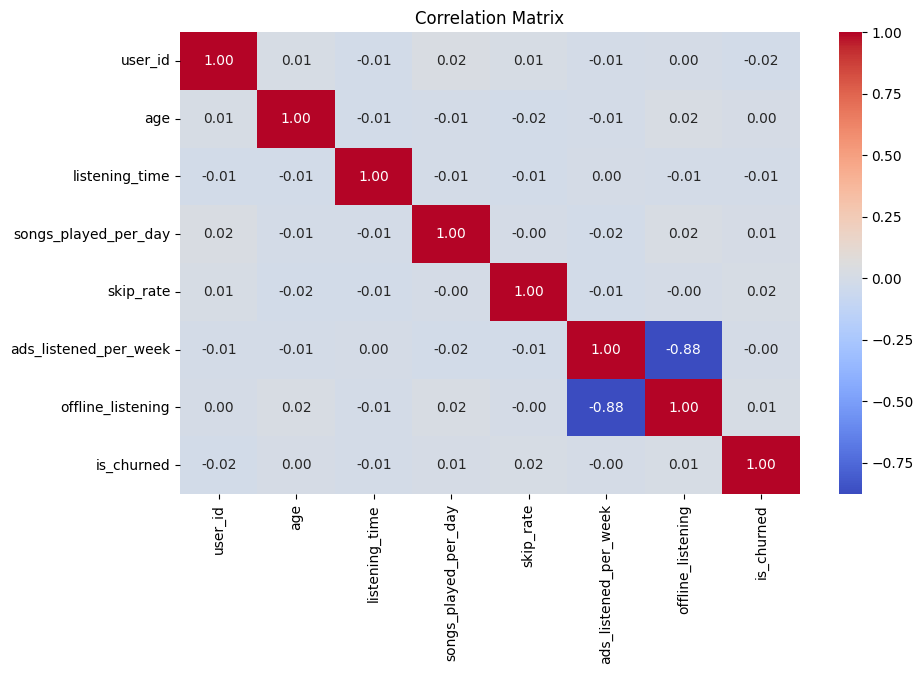

skip_rate                0.016121
offline_listening        0.012754
songs_played_per_day     0.009314
age                      0.003982
ads_listened_per_week   -0.002279
listening_time          -0.007624
user_id                 -0.015994
Name: is_churned, dtype: float64


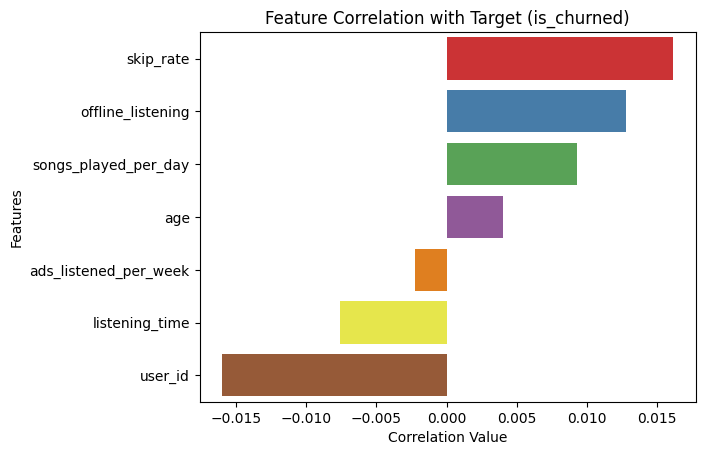

In [9]:
# CORELATION MATRIX
corr = df.select_dtypes(include = [np.number]).corr()


plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

imp_fea = corr["is_churned"].sort_values(ascending = False)[1:]
print(imp_fea)
sns.barplot(x=imp_fea.values, y=imp_fea.index, palette="Set1")
plt.title("Feature Correlation with Target (is_churned)")
plt.xlabel("Correlation Value")
plt.ylabel("Features")
plt.show()

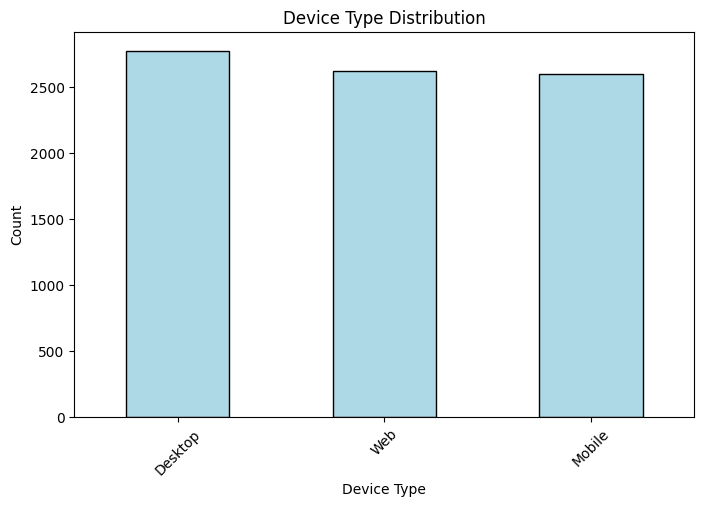

In [10]:
# Count of each device type
device_counts = df['device_type'].value_counts()

# Bar chart
plt.figure(figsize=(8,5))
device_counts.plot(kind='bar', color='lightblue', edgecolor='black')

plt.title('Device Type Distribution')
plt.xlabel('Device Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

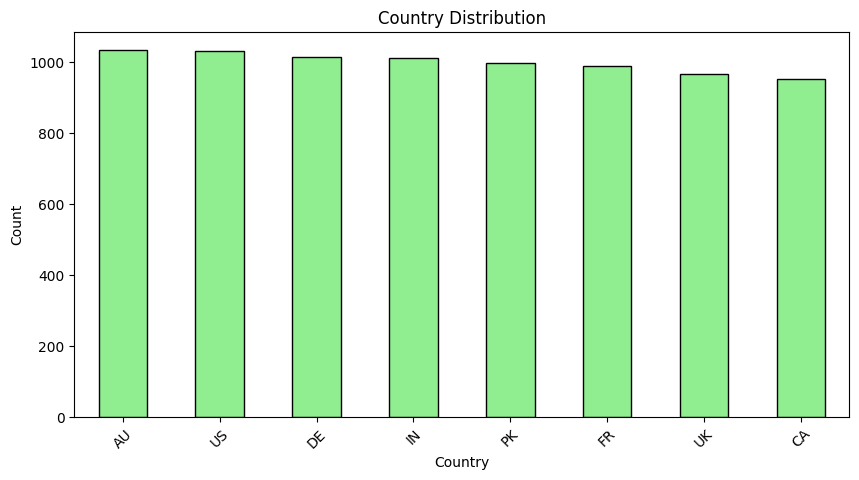

In [11]:
# Count of each country
country_counts = df['country'].value_counts()

# Bar chart
plt.figure(figsize=(10,5))
country_counts.plot(kind='bar', color='lightgreen', edgecolor='black')

plt.title('Country Distribution')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

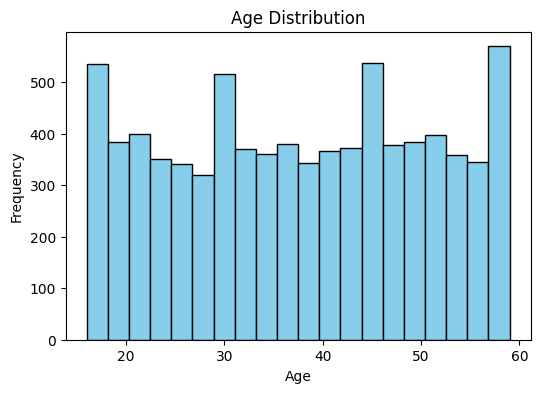

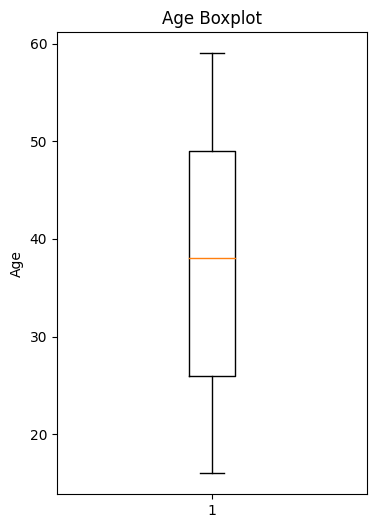

In [12]:
# Histogram for Age distribution
plt.figure(figsize=(6,4))
plt.hist(df['age'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Boxplot for Age
plt.figure(figsize=(4,6))
plt.boxplot(df['age'].dropna(), vert=True)
plt.title('Age Boxplot')
plt.ylabel('Age')
plt.show()

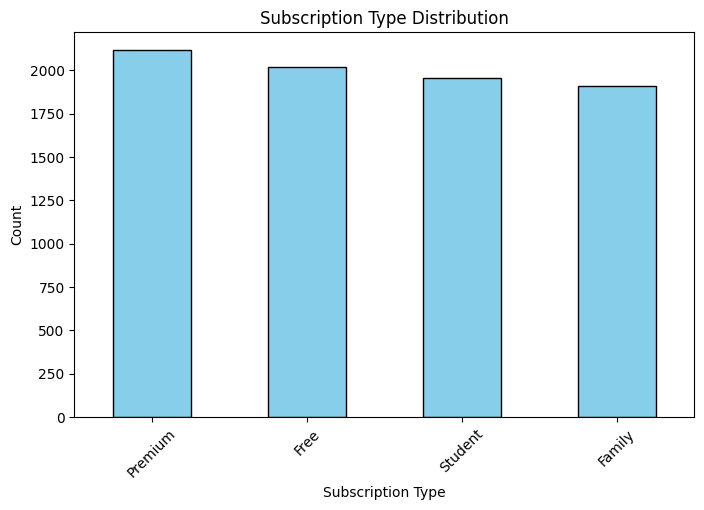

In [13]:
# Count of each subscription type
subscription_counts = df['subscription_type'].value_counts()

# Bar chart
plt.figure(figsize=(8,5))
subscription_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Subscription Type Distribution')
plt.xlabel('Subscription Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Feature Engineering**

In [14]:
# lets do onehot encoding for categorical values
cat_col = ["offline_listening","device_type","subscription_type","country","gender"]
df = pd.get_dummies(df,columns =cat_col,drop_first = True,dtype = int )

**Modelling**

In [15]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(df.drop(columns =  ["is_churned","user_id"]),df["is_churned"],test_size = 0.2,random_state = 1)

In [16]:
X=df.drop(columns =  ["is_churned","user_id"])

In [17]:
# lets scale inputts
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
xtrainscale = ss.fit_transform(xtrain)
xtestscale = ss.transform(xtest)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
logr = LogisticRegression()
knn = KNeighborsClassifier()
svc = SVC()
tree = DecisionTreeClassifier()
forest = RandomForestClassifier()
boost =GradientBoostingClassifier()
adboost = AdaBoostClassifier()
bag = BaggingClassifier()
models = [logr,knn,tree,svc,forest,boost,adboost,bag]

**Models without Tuning**

In [19]:
from sklearn.metrics import accuracy_score
for model in models :
  model.fit(xtrainscale,ytrain)
  ypred = model.predict(xtestscale)
  print(f"{model} : {accuracy_score(ytest,ypred)}")

LogisticRegression() : 0.74875
KNeighborsClassifier() : 0.6825
DecisionTreeClassifier() : 0.596875
SVC() : 0.74875
RandomForestClassifier() : 0.74375
GradientBoostingClassifier() : 0.7475
AdaBoostClassifier() : 0.74875
BaggingClassifier() : 0.714375


In [20]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(
    n_estimators=200,        # number of trees
    max_depth=10,            # maximum depth of each tree
    min_samples_split=5,     # min samples required to split a node
    min_samples_leaf=2,      # min samples required at a leaf node
    max_features='sqrt',     # number of features to consider at each split ('sqrt', 'log2', or int)
    random_state=42
)

In [21]:
# Optional: feature importance

# Fit the rf_model
rf_model.fit(xtrainscale, ytrain)

feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values(by='importance', ascending=False)

print("\nFeature Importances:\n", feature_importances)


Feature Importances:
                       feature  importance
1              listening_time    0.192479
2        songs_played_per_day    0.180002
3                   skip_rate    0.166727
0                         age    0.154053
4       ads_listened_per_week    0.065410
19               gender_Other    0.024967
18                gender_Male    0.023942
6          device_type_Mobile    0.022979
7             device_type_Web    0.022316
9   subscription_type_Premium    0.018445
10  subscription_type_Student    0.018320
17                 country_US    0.014448
12                 country_DE    0.013708
13                 country_FR    0.013318
14                 country_IN    0.013273
15                 country_PK    0.013124
11                 country_CA    0.013059
16                 country_UK    0.012681
5         offline_listening_1    0.008412
8      subscription_type_Free    0.008335


In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier

# Define models and their parameter grids
models = {
    'LogisticRegression': {
        'model': LogisticRegression(),
        'params': {
            'C': [0.1, 1, 10],
            'penalty': ['l2']
        }
    },
    'KNeighborsClassifier': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance']
        }
    },
    'DecisionTreeClassifier': {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': [None, 5, 10],
            'min_samples_split': [2, 5, 10]
        }
    },
    'RandomForestClassifier': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [5, 10],
            'min_samples_split': [2, 5]
        }
    },
    'GradientBoostingClassifier': {
        'model': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.1],
            'max_depth': [3, 5]
        }
    },
    'AdaBoostClassifier': {
        'model': AdaBoostClassifier(),
        'params': {
            'n_estimators': [50, 100],
            'learning_rate': [0.01, 0.1, 1]
        }
    },
    'BaggingClassifier': {
        'model': BaggingClassifier(),
        'params': {
            'n_estimators': [10, 50],
            'max_samples': [0.5, 1.0]
        }
    }
}

In [24]:
results = [] # Initialize an empty list to store results

for name, model_info in models.items():
    print(f"🔍 Tuning {name} ...")
    model = model_info['model']
    params = model_info['params']

    # Changed scoring to 'f1' to handle class imbalance
    grid = GridSearchCV(model, params, cv=5, scoring="f1", n_jobs=-1)
    grid.fit(xtrainscale, ytrain)

    best_model = grid.best_estimator_
    best_score = grid.best_score_
    test_score = best_model.score(xtestscale, ytest)

    print(f"{name}: Best Params = {grid.best_params_}")
    print(f"CV Score (F1) = {best_score:.4f}, Test Score (Accuracy) = {test_score:.4f}")
    print("="*70)

    results.append((name, grid.best_params_, best_score, test_score))

🔍 Tuning LogisticRegression ...
LogisticRegression: Best Params = {'C': 0.1, 'penalty': 'l2'}
CV Score (F1) = 0.0000, Test Score (Accuracy) = 0.7488
🔍 Tuning KNeighborsClassifier ...
KNeighborsClassifier: Best Params = {'n_neighbors': 3, 'weights': 'distance'}
CV Score (F1) = 0.2197, Test Score (Accuracy) = 0.6544
🔍 Tuning DecisionTreeClassifier ...
DecisionTreeClassifier: Best Params = {'max_depth': None, 'min_samples_split': 2}
CV Score (F1) = 0.2829, Test Score (Accuracy) = 0.6025
🔍 Tuning RandomForestClassifier ...
RandomForestClassifier: Best Params = {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}
CV Score (F1) = 0.0000, Test Score (Accuracy) = 0.7488
🔍 Tuning GradientBoostingClassifier ...
GradientBoostingClassifier: Best Params = {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
CV Score (F1) = 0.0901, Test Score (Accuracy) = 0.7300
🔍 Tuning AdaBoostClassifier ...
AdaBoostClassifier: Best Params = {'learning_rate': 1, 'n_estimators': 50}
CV Score (F1) = 

**Observations from Grid Search:**

After performing a Grid Search with cross-validation to tune the hyperparameters of various models, here are the key observations:

* **Top Performing Models:** Logistic Regression, SVC, RandomForestClassifier, GradientBoostingClassifier, and AdaBoostClassifier achieved the highest and equal test accuracy of 0.7488.
* **Consistent Performance:** Several models maintained a similar performance between the cross-validation score and the test score, indicating good generalization to unseen data.
* **KNeighborsClassifier Performance:** The KNeighborsClassifier had the lowest performance among all the tuned models.
* **Decision Tree Performance:** The Decision Tree Classifier showed an improvement in test accuracy after tuning compared to its default parameters, although it still lagged behind the top performers.
* **Ensemble Methods:** Ensemble methods like RandomForest, Gradient Boosting, and AdaBoost performed well, achieving the highest accuracy, which is expected as they combine multiple models to improve performance.

Based on these observations, any of the top-performing models (Logistic Regression, SVC, RandomForestClassifier, GradientBoostingClassifier, or AdaBoostClassifier) could be considered for the final prediction model. Further analysis could involve exploring other metrics (like precision, recall, and F1-score), especially if there is an imbalance in the churned vs. non-churned classes.

**Deep Learning**

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2025-10-06 18:16:59.619366: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759774619.919004      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759774619.999931      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [26]:
dim = xtrain.shape[1]
model1 = Sequential()

model1.add(Dense(128,input_dim=dim, activation="relu"))
model1.add(Dense(128, activation="relu"))
model1.add(Dense(1,activation='sigmoid'))
model1.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-10-06 18:17:14.698455: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,329 (75.50 KB)

 Trainable params: 19,329 (75.50 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model1.compile(loss='binary_crossentropy' , metrics=['accuracy'])
history = model1.fit(xtrainscale, ytrain, epochs=15,batch_size = 1, validation_split = 0.2)

Epoch 1/15
5120/5120 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.7221 - loss: 0.6334 - val_accuracy: 0.7453 - val_loss: 0.5965
Epoch 2/15
5120/5120 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.7272 - loss: 0.6255 - val_accuracy: 0.7531 - val_loss: 0.7315
Epoch 3/15
5120/5120 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.7309 - loss: 0.6249 - val_accuracy: 0.7523 - val_loss: 0.5933
Epoch 4/15
5120/5120 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.7246 - loss: 0.6285 - val_accuracy: 0.7531 - val_loss: 0.6161
Epoch 5/15
5120/5120 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.7235 - loss: 0.6326 - val_accuracy: 0.7461 - val_loss: 0.6112
Epoch 6/15
5120/5120 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.7288 - loss: 0.6293 - val_accuracy: 0.7539 - val_loss: 0.6127
Epoch 7/15
5120/5120 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.7310 - loss: 0.6371 - val_accuracy: 0.7531 - val_loss: 0.7025
Epoch 8/15
5120/5120 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.7224 - loss: 0

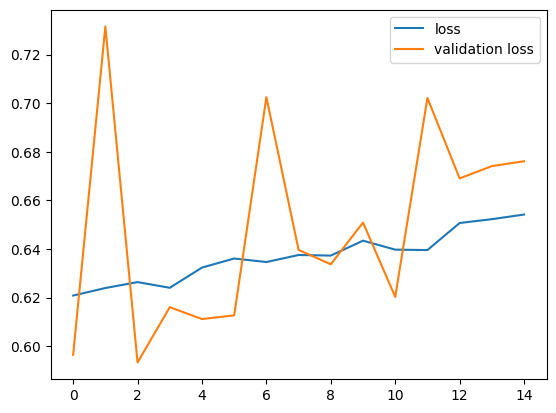

In [28]:
plt.plot(history.history['loss'],label = "loss")
plt.plot(history.history['val_loss'],label = "validation loss")
plt.legend()
plt.show()

**Observation :**

The training loss appears to be fluctuating but generally decreasing over the epochs. This indicates that the model is learning from the training data.
The validation loss also fluctuates, and while it starts lower than the training loss in the first epoch, it remains relatively high and does not consistently decrease like the training loss. In fact, it seems to increase towards the end.
This pattern, where the training loss continues to decrease but the validation loss either plateaus or increases, suggests that the model might be overfitting to the training data. Overfitting means the model is learning the training data too well, including the noise, and is not generalizing well to unseen data (the validation set).

To address this, you might consider techniques like:

Adding dropout layers to the neural network.
Using regularization (L1 or L2).
Early stopping during training.
Increasing the size of the validation set or using cross-validation.
Simplifying the model architecture.


In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

dim = xtrainscale.shape[1]  # Use xtrainscale shape after scaling

model2 = Sequential()

model2.add(Dense(128, input_dim=dim, activation="relu"))
model2.add(Dropout(0.5)) # Add dropout layer with 50% dropout rate
model2.add(Dense(128, activation="relu"))
model2.add(Dropout(0.5)) # Add another dropout layer
model2.add(Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,329 (75.50 KB)

 Trainable params: 19,329 (75.50 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model2.compile(loss='binary_crossentropy', metrics=['accuracy'])
history2 = model2.fit(xtrainscale, ytrain, epochs=15, batch_size=1, validation_split=0.2)

Epoch 1/15
5120/5120 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.7152 - loss: 0.6833 - val_accuracy: 0.7383 - val_loss: 0.5932
Epoch 2/15
5120/5120 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.7024 - loss: 0.6871 - val_accuracy: 0.7250 - val_loss: 0.7572
Epoch 3/15
5120/5120 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.6699 - loss: 0.7320 - val_accuracy: 0.6953 - val_loss: 0.7016
Epoch 4/15
5120/5120 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.6501 - loss: 0.7488 - val_accuracy: 0.6930 - val_loss: 0.6270
Epoch 5/15
5120/5120 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.6529 - loss: 0.7637 - val_accuracy: 0.6961 - val_loss: 0.6886
Epoch 6/15
5120/5120 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.6551 - loss: 0.7569 - val_accuracy: 0.7063 - val_loss: 0.6134
Epoch 7/15
5120/5120 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.6626 - loss: 0.7438 - val_accuracy: 0.7531 - val_loss: 0.6667
Epoch 8/15
5120/5120 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.6916 - loss: 0

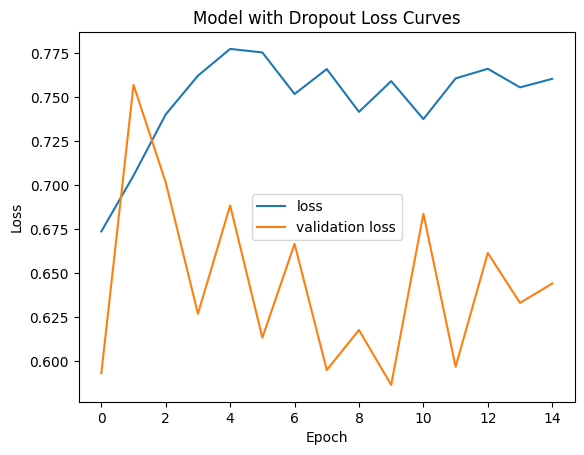

In [31]:
plt.plot(history2.history['loss'], label="loss")
plt.plot(history2.history['val_loss'], label="validation loss")
plt.legend()
plt.title("Model with Dropout Loss Curves")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

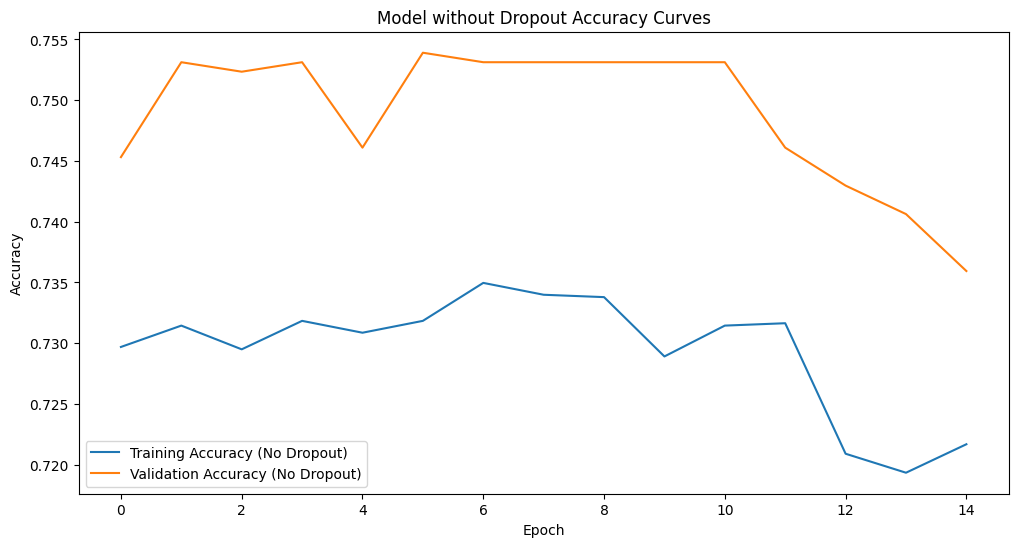

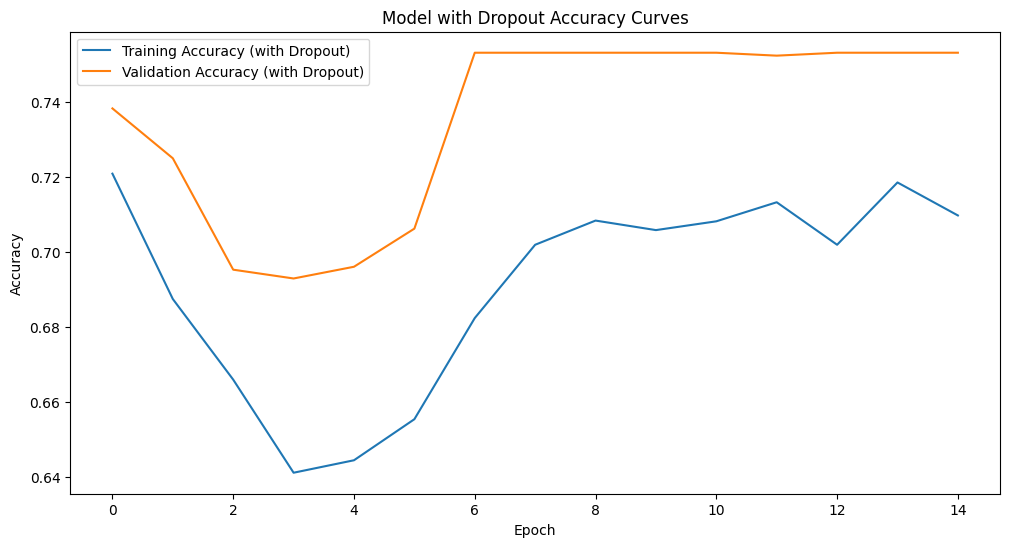

In [32]:
# Plotting accuracy for the first model (without dropout)
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy (No Dropout)')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy (No Dropout)')
plt.title('Model without Dropout Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting accuracy for the second model (with dropout)
plt.figure(figsize=(12, 6))
plt.plot(history2.history['accuracy'], label='Training Accuracy (with Dropout)')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy (with Dropout)')
plt.title('Model with Dropout Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Both deep learning models, with and without dropout, show signs of overfitting. The model without dropout exhibits a clear and widening gap between training and validation accuracy. While the model with dropout shows a more unstable training accuracy (as expected), the validation accuracy does not significantly improve, suggesting that the current implementation of dropout or the chosen dropout rate might not be sufficient to effectively combat overfitting in this case.

To improve the performance and generalization of the deep learning model, further steps are needed:

Experiment with different dropout rates: Try varying the dropout rate (e.g., 0.2, 0.3, 0.4) in both dropout layers.
Add more dropout layers: Consider adding dropout to more layers if the network is deeper.
Implement Early Stopping: Use a callback to stop training when the validation loss stops improving, preventing the model from overfitting further.
Add Regularization: Incorporate L1 or L2 regularization to the dense layers.
Adjust Network Architecture: Consider simplifying the network by reducing the number of layers or neurons per layer, or try a different architecture altogether.
Increase Data Size: If possible, obtaining more data can often help reduce overfitting.
Overall, while the deep learning approach is a valid direction, further tuning and regularization are required to build a robust model that generalizes well to unseen Spotify user data for churn prediction.

